In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from scipy import signal
import glob
import pickle

# data preparation

In [2]:
csv_files = glob.glob(
    r"C:\Users\Max_G\OneDrive\IUBH\5_Semester\Model_Engeneering\Public_Transport_Forecasting\data\interim\Cluster_Data_All_Month\*.csv"
)

In [3]:
weekday_file_paths = [path for path in csv_files if 'weekday' in path]
weekend_file_paths = [path for path in csv_files if 'weekend' in path]

In [4]:
weekday_dict = {}

for index, file in enumerate(weekday_file_paths):
    current_df = pd.read_csv(file, index_col=[0])
    current_df['Date'] =  pd.to_datetime(current_df['Date'])
    current_df.index = pd.to_datetime(current_df.index)

    weekday_dict[int(weekday_file_paths[index][-13:-12])] = current_df

In [5]:
weekend_dict = {}  

for index, file in enumerate(weekend_file_paths):
    current_df = pd.read_csv(file, index_col=[0])
    current_df['Date'] = pd.to_datetime(current_df['Date'])
    current_df.index = pd.to_datetime(current_df.index)

    weekend_dict[int(weekend_file_paths[index][-13:-12])] = current_df

In [6]:
endog_week_dict = {}

for label in weekday_dict:
    current_df = weekday_dict[label]
    current_df = current_df.reset_index()
    current_df = current_df.drop(columns=['index', 'Hour', 'Weekday', 'Date'])
    endog_week_dict[label] = current_df

In [7]:
endog_weekend_dict = {}

for label in weekend_dict:
    current_df = weekend_dict[label]
    current_df = current_df.reset_index()
    current_df = current_df.drop(columns=['index', 'Hour', 'Weekday', 'Date'])
    endog_weekend_dict[label] = current_df

# Model Building for the Week

## Creating a SARIMA Model for all week data

now starting calculation 0
now ended calculation 0


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 1
now ended calculation 1


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 2
now ended calculation 2


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 3
now ended calculation 3


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 4
now ended calculation 4


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 5
now ended calculation 5


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\3731583778.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_aic = df_order_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


  label      order seasonal_order           AIC
0     0  (0, 1, 6)  (1, 1, 1, 24)  35906.791973
1     1  (0, 1, 6)  (1, 1, 1, 24)  25518.932855
2     2  (0, 1, 6)  (1, 1, 1, 24)  18036.395928
3     3  (0, 1, 6)  (1, 1, 1, 24)  23718.410585
4     4  (0, 1, 6)  (1, 1, 1, 24)  36431.197838
5     5  (0, 1, 6)  (1, 1, 1, 24)  27182.767041
{0: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024A80433160>, 1: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFF372470>, 2: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AA38A2650>, 3: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024A8038E680>, 4: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFA142E60>, 5: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFF6C7B80>}


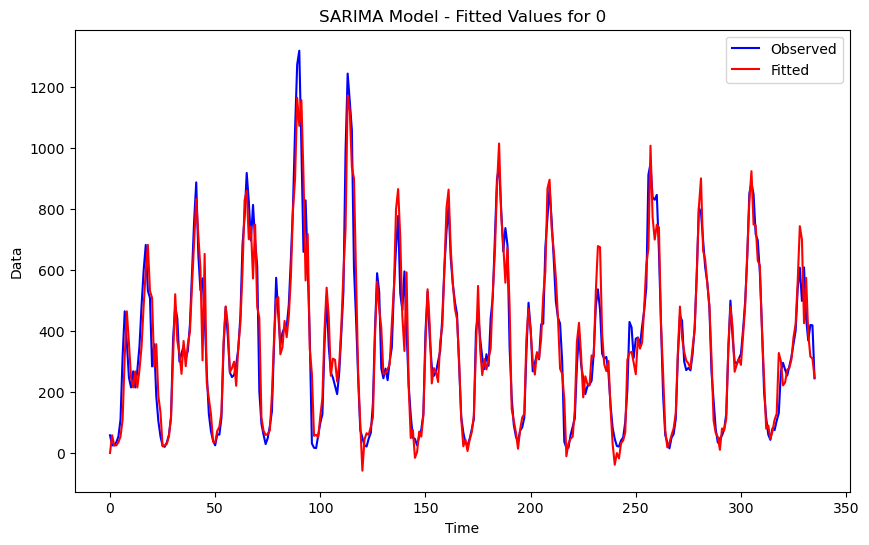

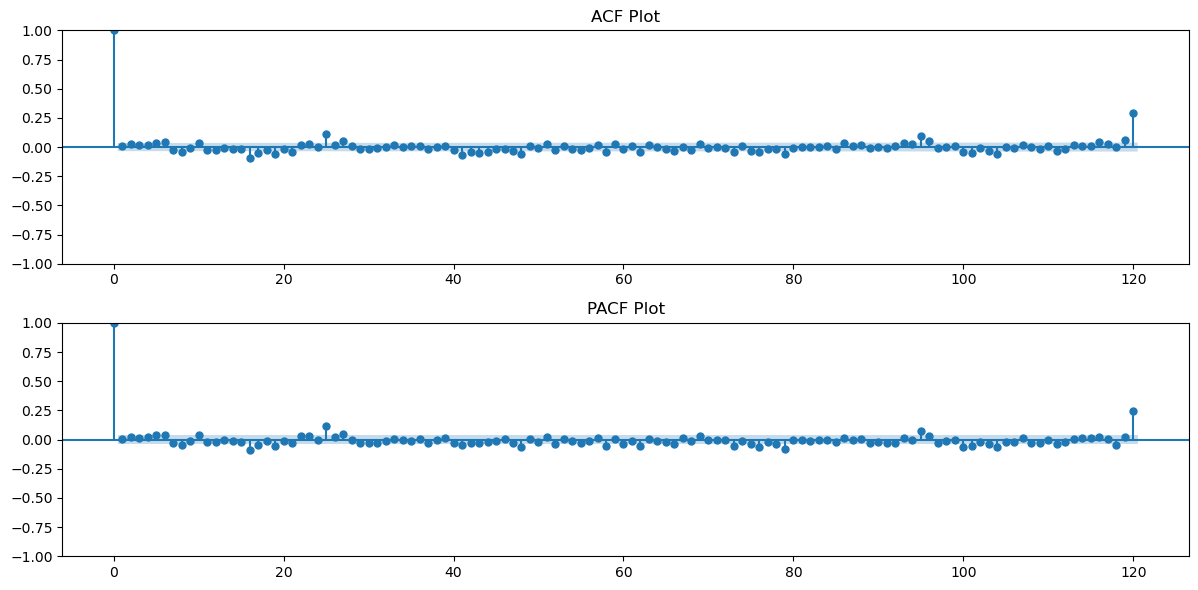

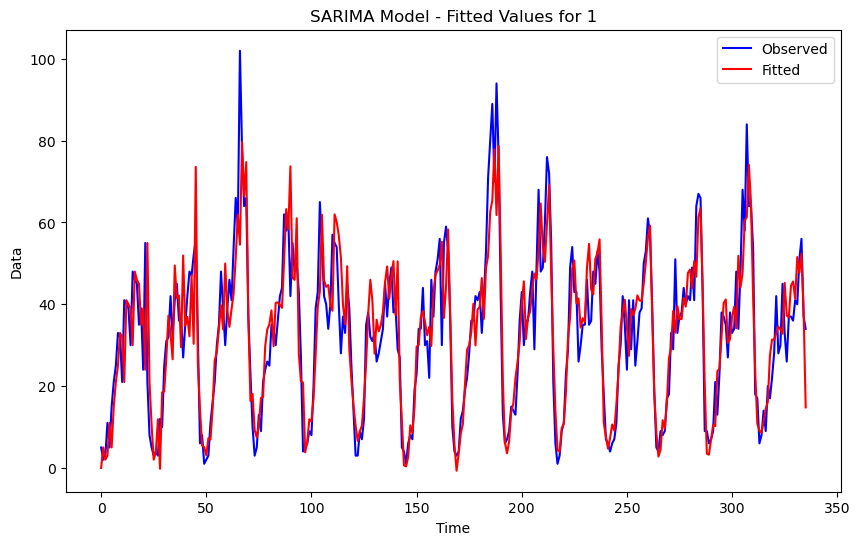

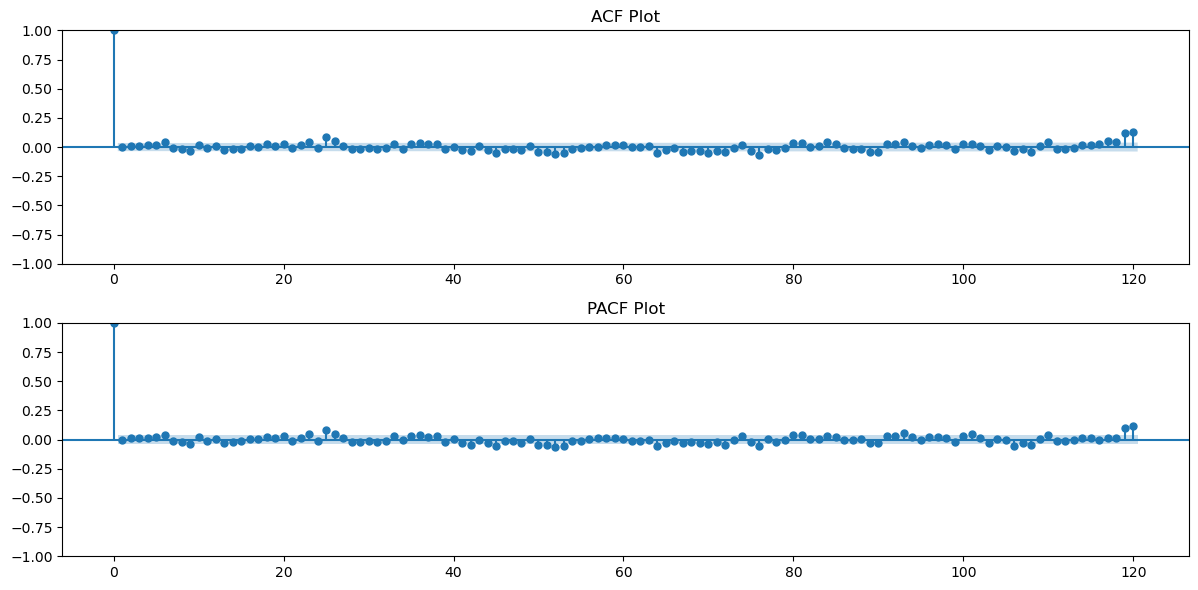

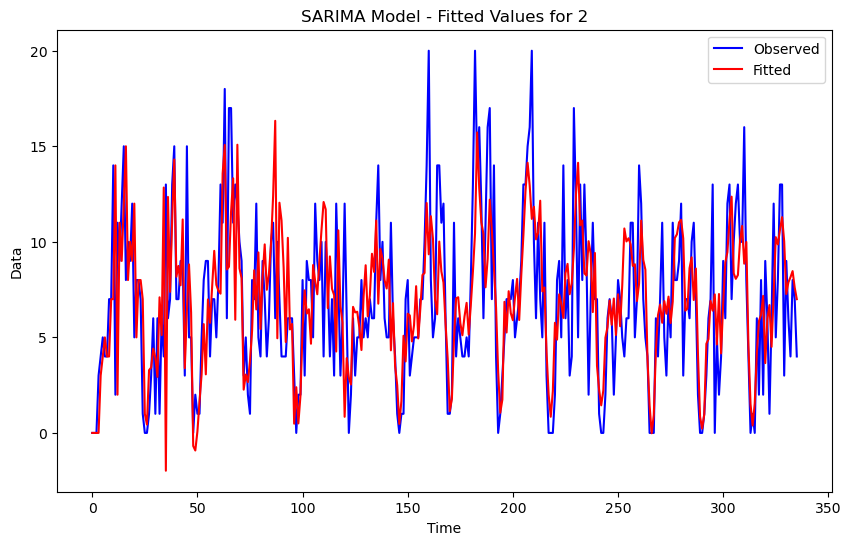

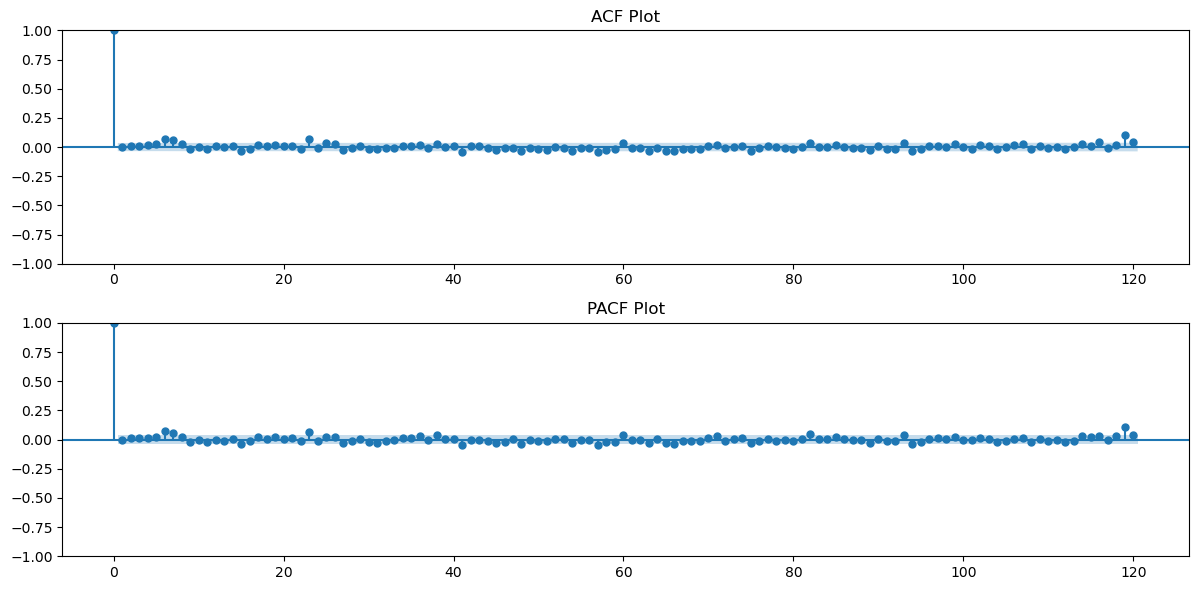

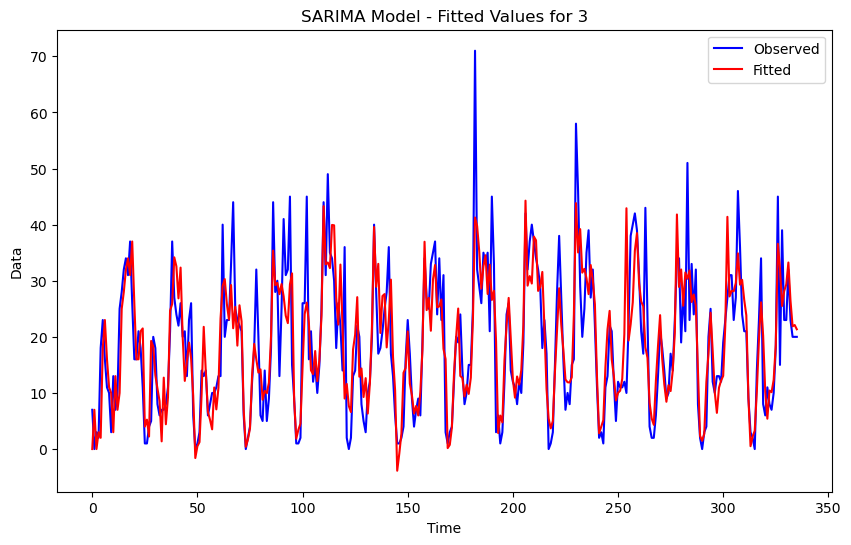

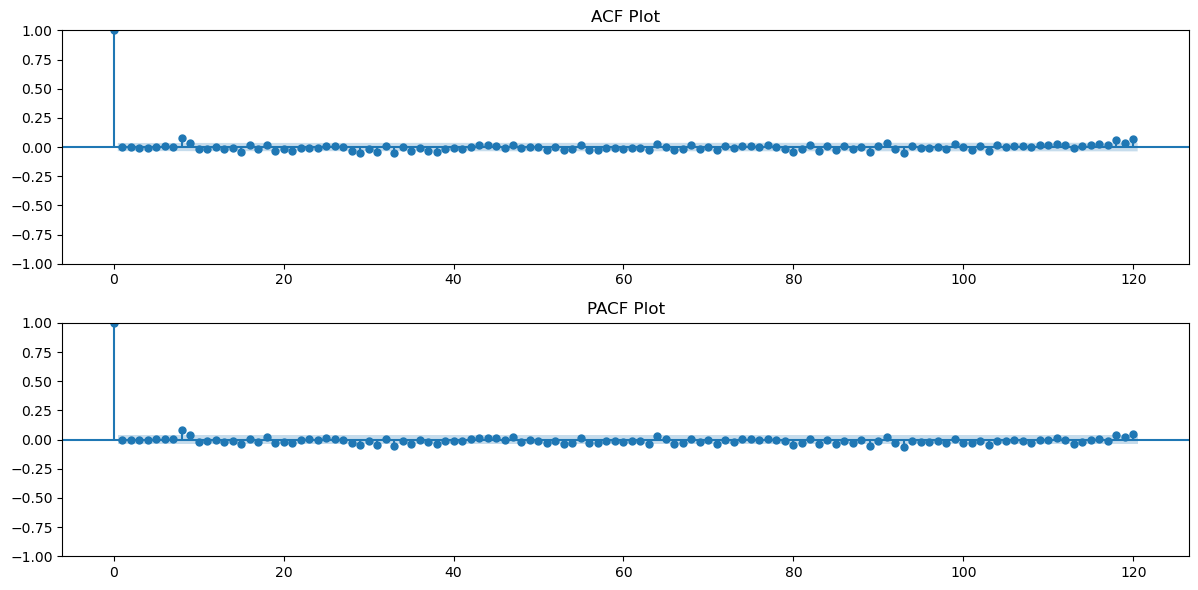

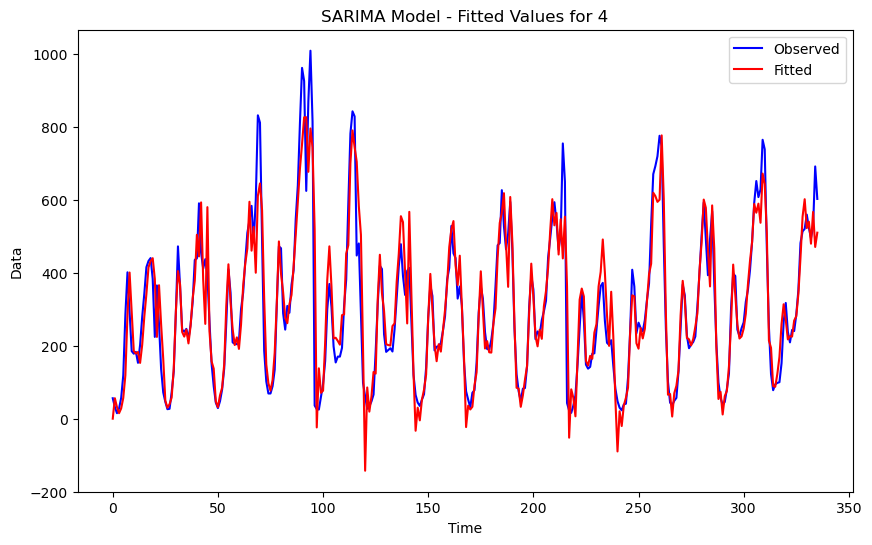

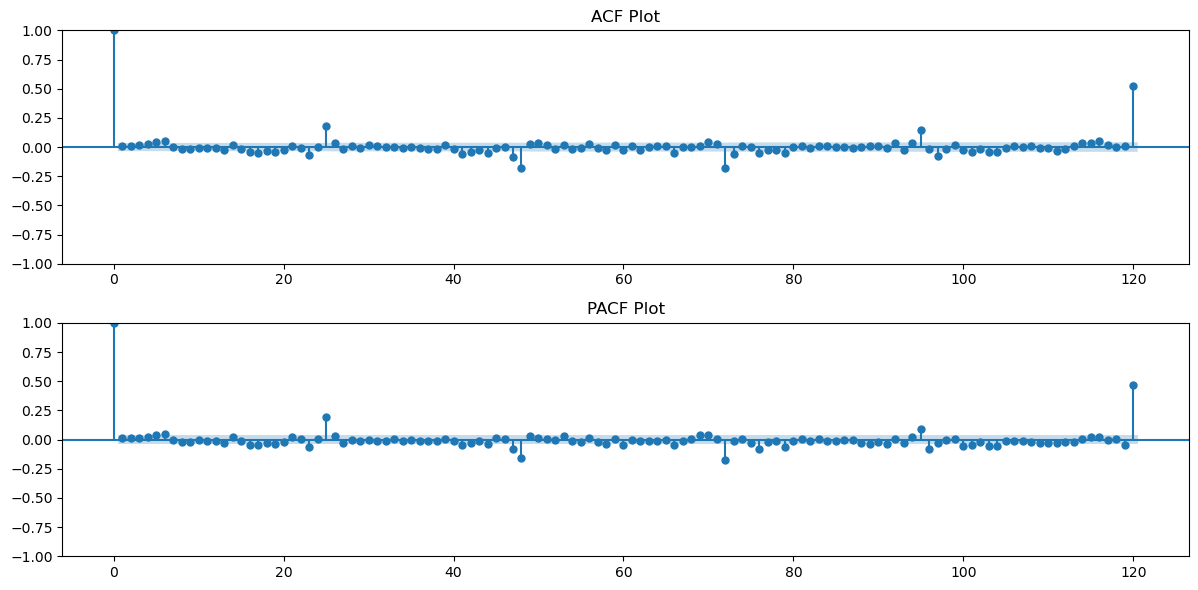

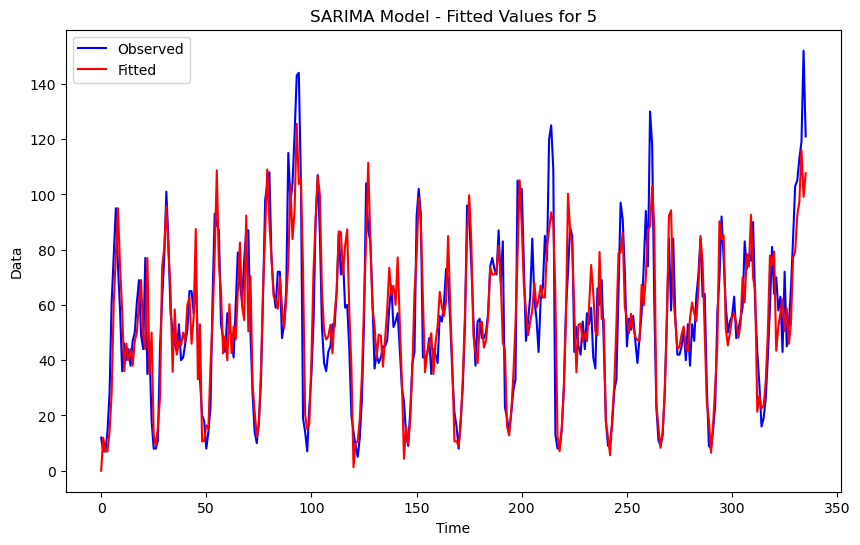

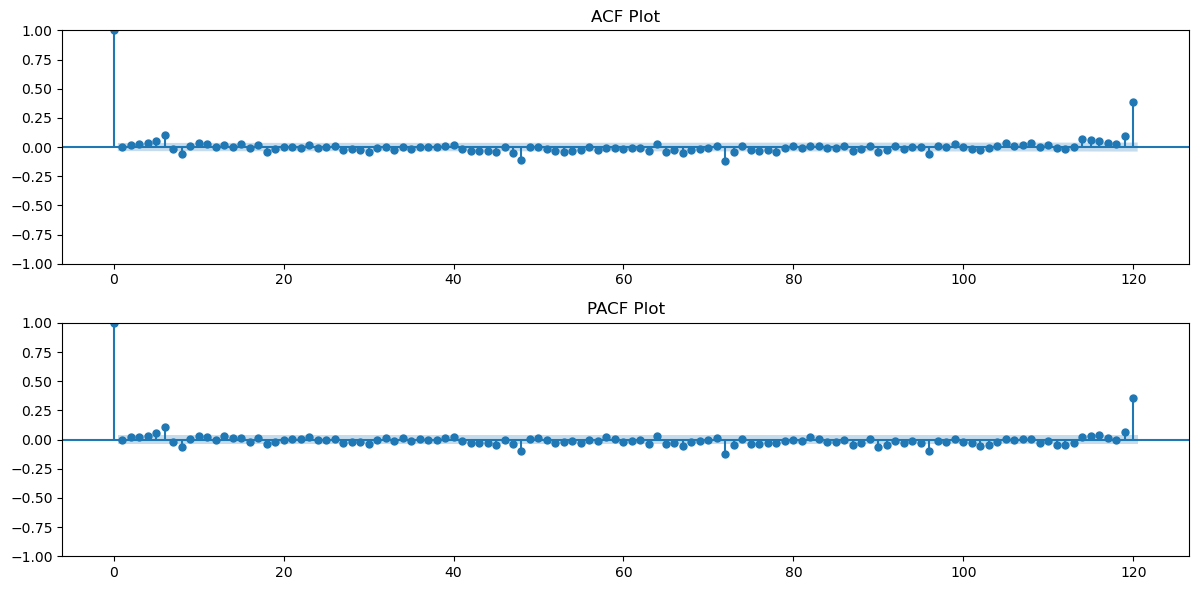

In [112]:
# Initialize an empty DataFrame to store results
df_order_week_aic = pd.DataFrame(columns=['label', 'order', 'seasonal_order', 'AIC'])

# Initialize a dictionary to store the fitted SARIMA models
fitted_models_week = {}

# Define the fixed order and seasonal_order
order = (0, 1, 6)
seasonal_order = (1, 1, 1, 24)





# Iterate over the labels of the time series data
for label, endog in endog_week_dict.items():
    time = np.arange(len(endog))

    try:
        # Fit the SARIMA model with harmonic regression (exogenous variables)
        model = SARIMAX(endog, order=order, seasonal_order=seasonal_order)
        print('now starting calculation', label)
        results = model.fit()
        print('now ended calculation', label)
        
        # Append the results to the DataFrame
        new_row_data = {
            'label': label,
            'order': order,
            'seasonal_order': seasonal_order,
            'AIC': results.aic
        }
        df_order_week_aic = df_order_week_aic.append(new_row_data, ignore_index=True)

        # Save the fitted model to the dictionary
        fitted_models_week[label] = results

        folder_path = r"C:\Users\Max_G\OneDrive\IUBH\5_Semester\Model_Engeneering\Public_Transport_Forecasting\models\SARIMA_ALL_DATA\week"
        model_file_path = f"{folder_path}/sarima_model{label}.sav"

        # Save the fitted model to a file in the specified directory using pickle
        with open(model_file_path, 'wb') as model_file:
            pickle.dump(results, model_file)
        
        # Plot the observed data and the fitted values
        plt.figure(figsize=(10, 6))
        plt.plot(time[0:336], endog[0:336], label='Observed', color='blue')
        plt.plot(time[0:336], results.fittedvalues[0:336], label='Fitted', color='red')
        plt.xlabel('Time')
        plt.ylabel('Data')
        plt.title(f'SARIMA Model - Fitted Values for {label}')
        plt.legend()

        plot_path = r"C:\Users\Max_G\OneDrive\IUBH\5_Semester\Model_Engeneering\Public_Transport_Forecasting\reports\figures\Sarima_Models_Fitted\week"
        plot_file_path = f"{plot_path}/sarima_model{label}.png"

        # Save the plot to a file in the specified directory
        plt.savefig(plot_file_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plot_acf(results.resid, lags=120   , ax=plt.gca(), title='ACF Plot')
        plt.subplot(2, 1, 2)
        plot_pacf(results.resid, lags=120, ax=plt.gca(), title='PACF Plot')
        plt.tight_layout()

        plot_file_path = f"{plot_path}/sarima_model_acf_pacf{label}.png"

        # Save the plot to a file in the specified directory
        plt.savefig(plot_file_path)


    except Exception as e:
        print(f"Error for {label}: {e}")

# Print the DataFrame with AIC values for different labels
print(df_order_week_aic)

# Print the fitted models dictionary
print(fitted_models_week)

## Model Building for the Weekend

## Creating a SARIMA Model for weekend data

now starting calculation 0
now ended calculation 0


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 1
now ended calculation 1


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 2
now ended calculation 2


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 3
now ended calculation 3


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 4
now ended calculation 4


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


now starting calculation 5
now ended calculation 5


C:\Users\Max_G\AppData\Local\Temp\ipykernel_19616\1236705684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)
c:\Users\Max_G\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


  label      order seasonal_order           AIC
0     0  (2, 1, 0)  (1, 1, 1, 24)  13280.942361
1     1  (2, 1, 0)  (1, 1, 1, 24)  10205.983160
2     2  (2, 1, 0)  (1, 1, 1, 24)   7095.445331
3     3  (2, 1, 0)  (1, 1, 1, 24)   9772.016243
4     4  (2, 1, 0)  (1, 1, 1, 24)  14134.174713
5     5  (2, 1, 0)  (1, 1, 1, 24)  11130.529426
{0: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFF3D6740>, 1: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFF7A1540>, 2: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024AFBEC95A0>, 3: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024C7088EEF0>, 4: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024D0769B7F0>, 5: <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x0000024D07DE6290>}


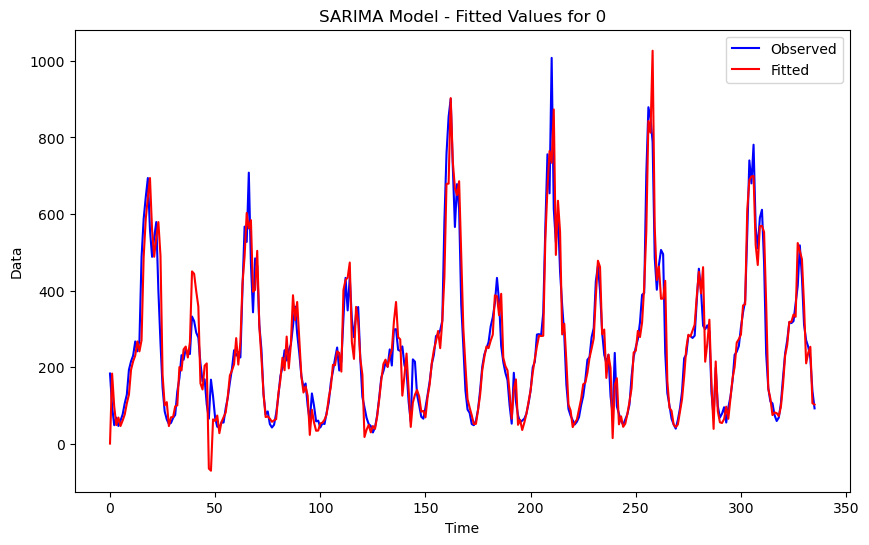

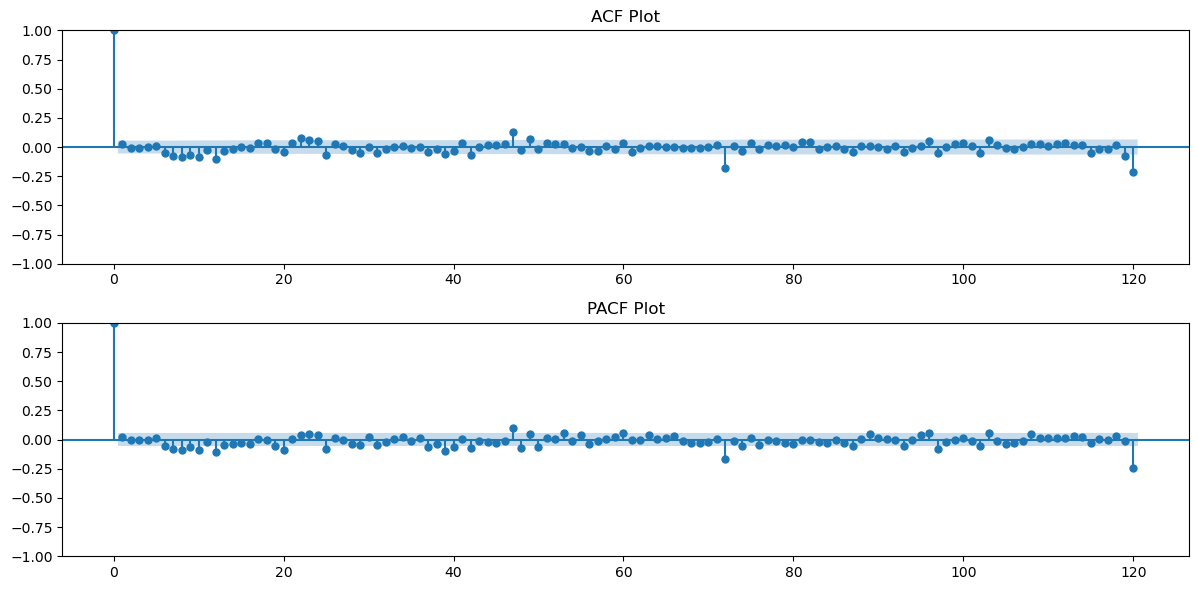

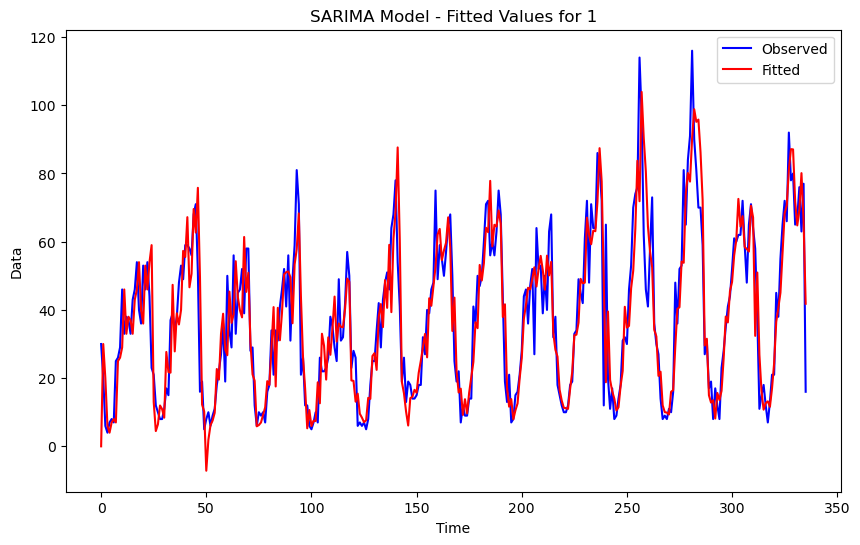

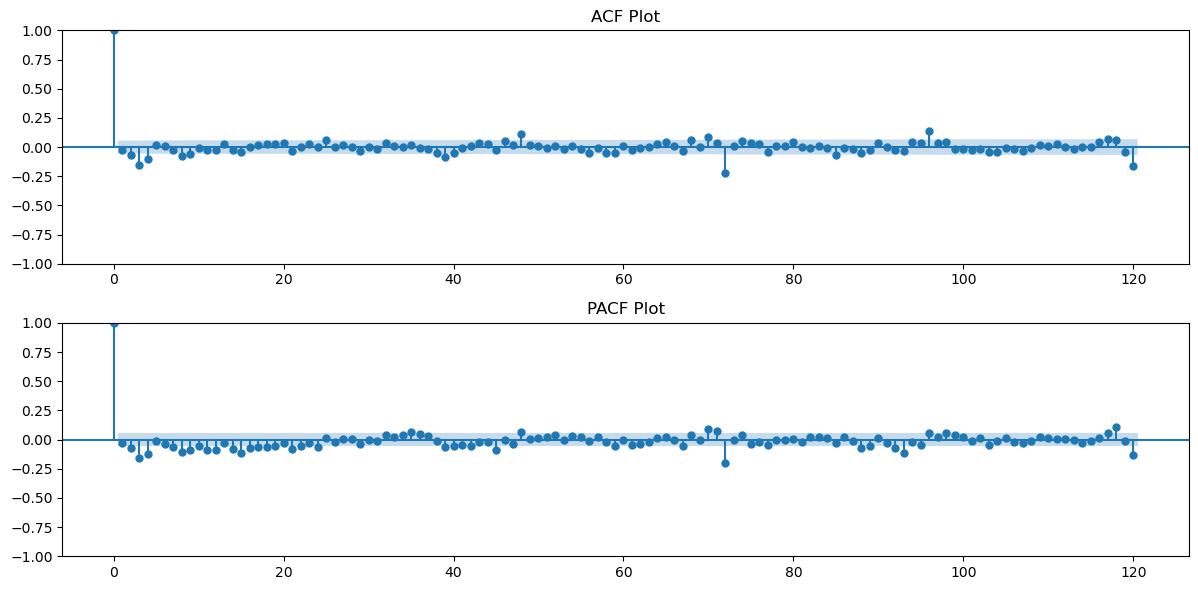

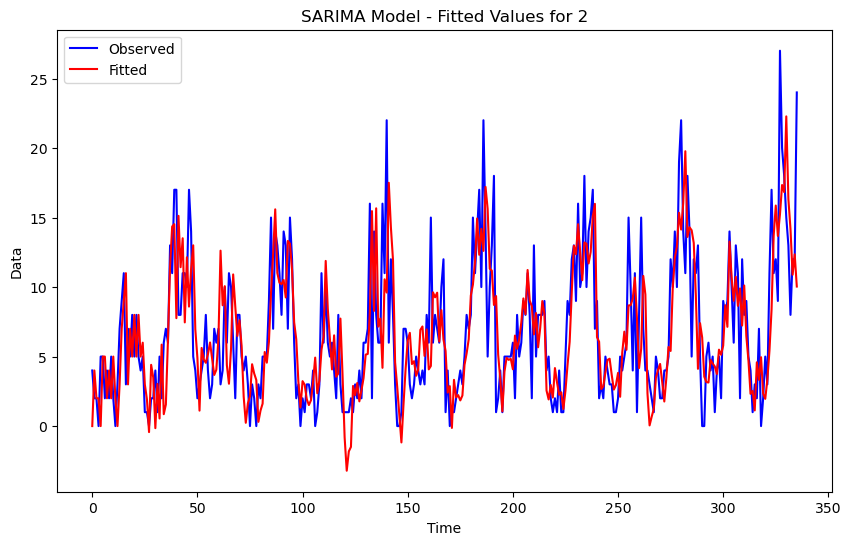

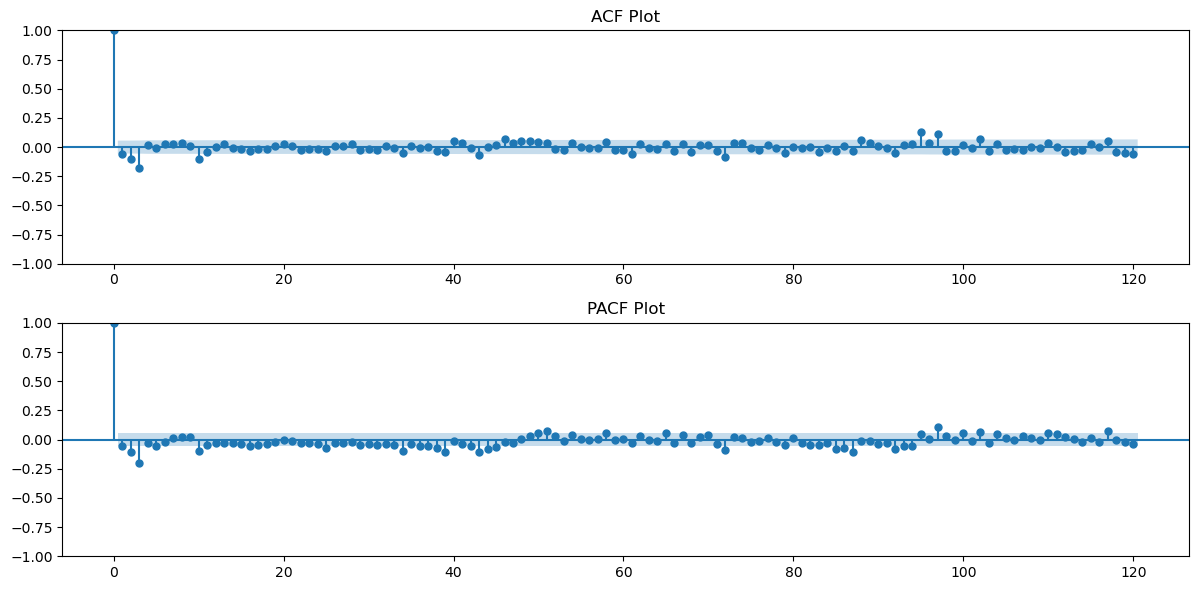

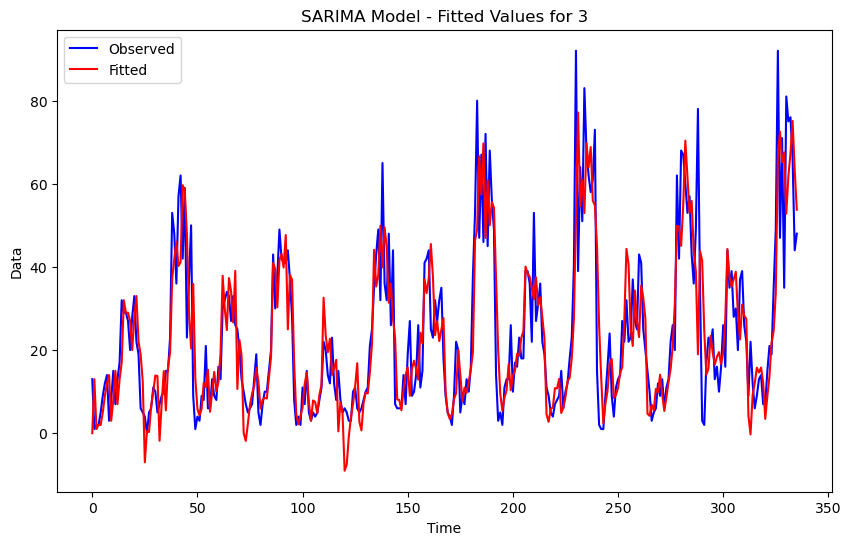

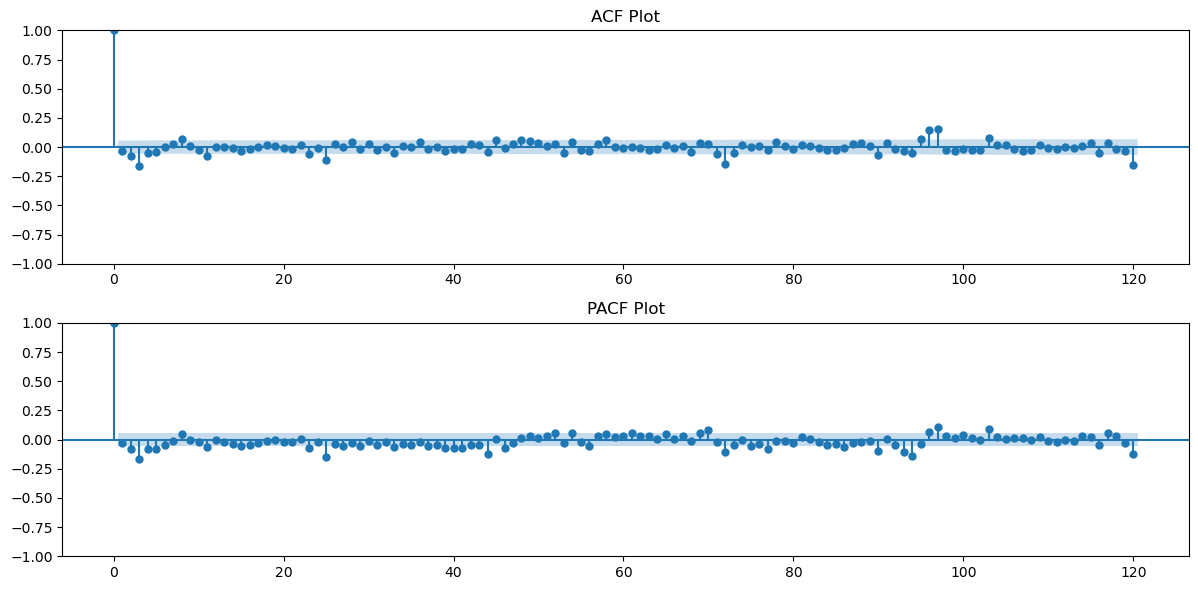

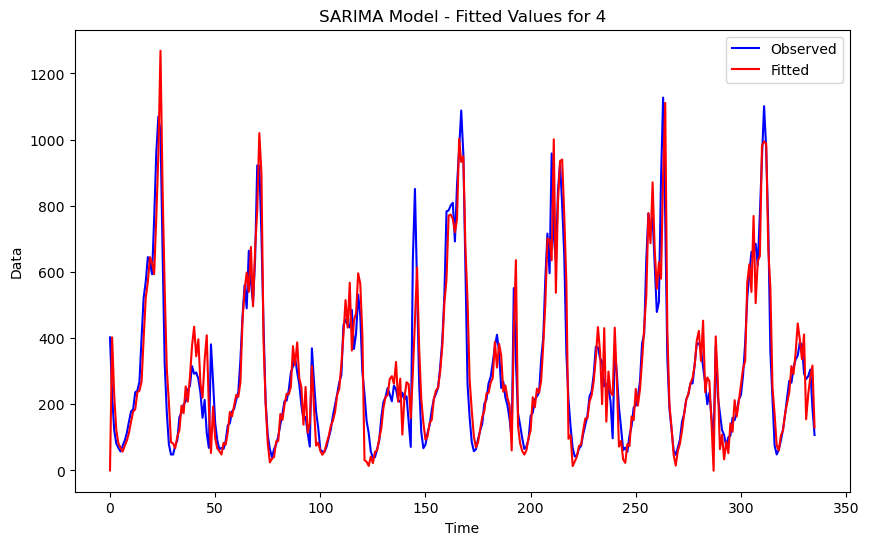

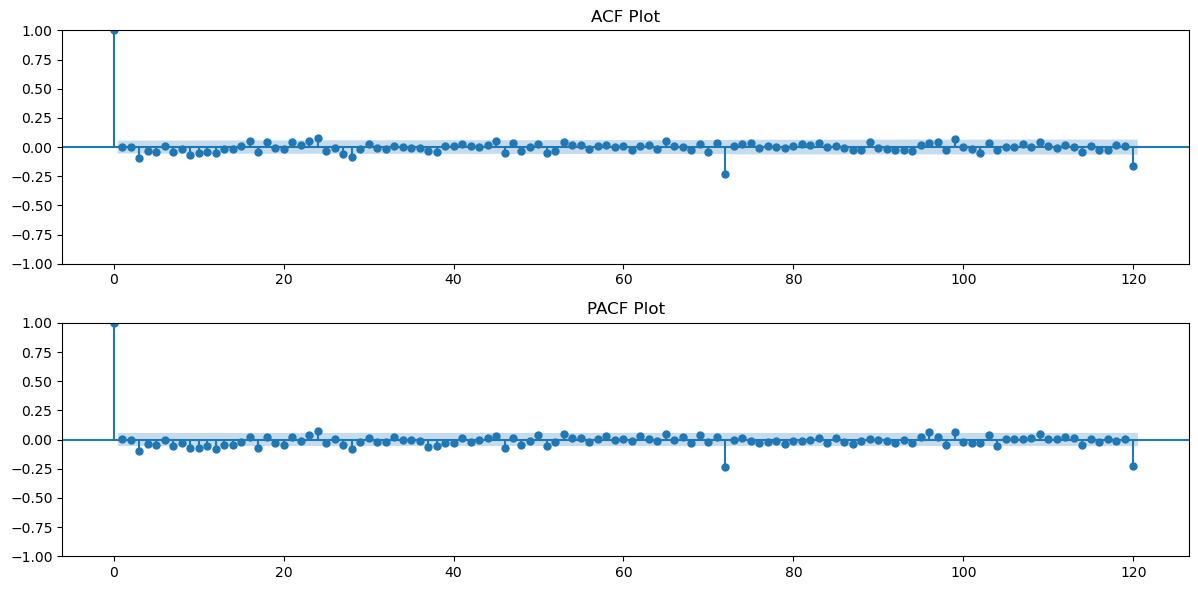

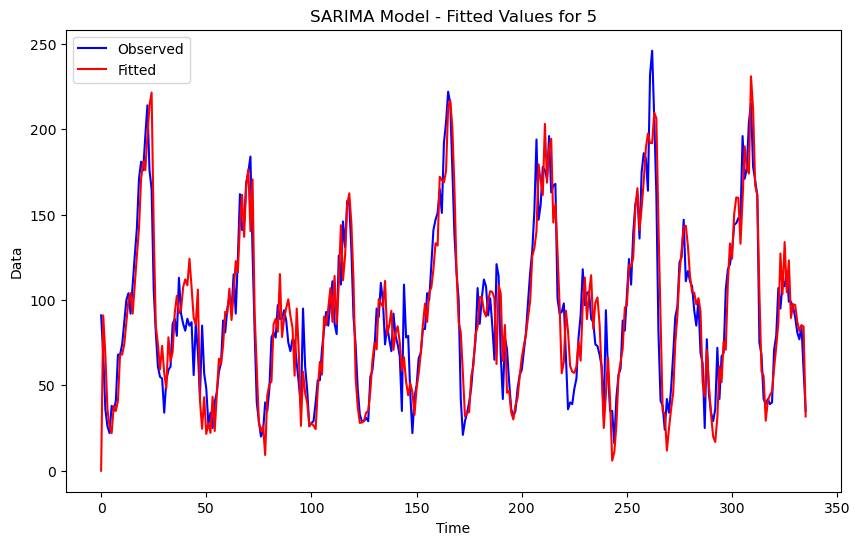

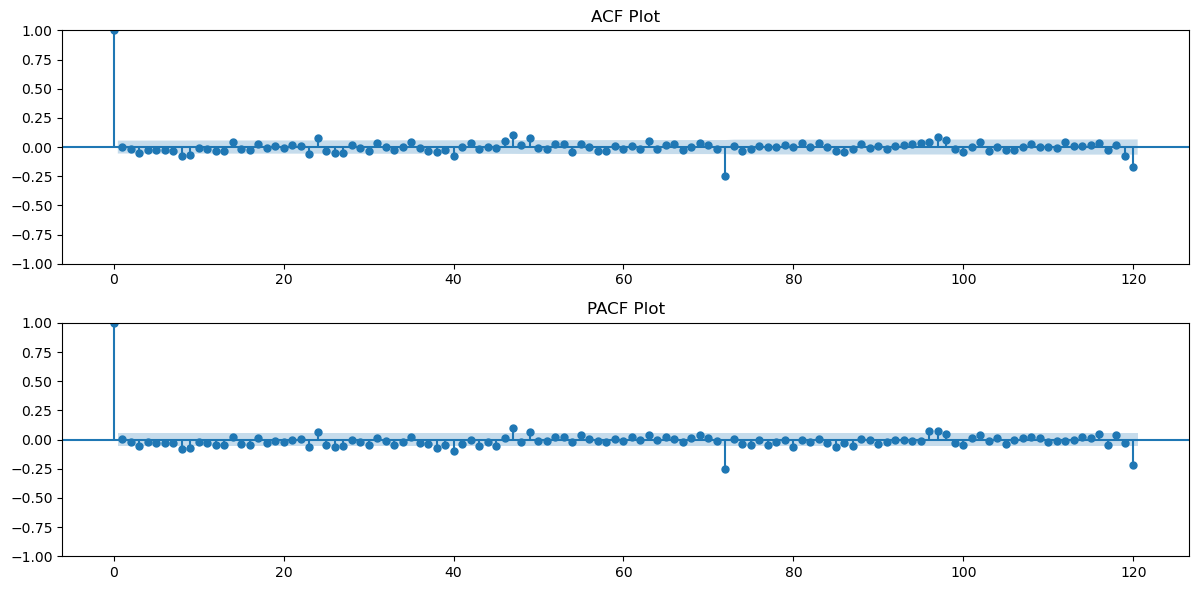

In [124]:
# Initialize an empty DataFrame to store results
df_order_weekend_aic = pd.DataFrame(columns=['label', 'order', 'seasonal_order', 'AIC'])

# Initialize a dictionary to store the fitted SARIMA models
fitted_models_weekend = {}

# Define the fixed order and seasonal_order
order=(2, 1, 0) 
seasonal_order=(1, 1, 1, 24)


# Iterate over the labels of the time series data
for label, endog in endog_weekend_dict.items():
    time = np.arange(len(endog))

    try:
        # Fit the SARIMA model with harmonic regression (exogenous variables)
        model = SARIMAX(endog, order=order, seasonal_order=seasonal_order)
        print('now starting calculation', label)
        results = model.fit()
        print('now ended calculation', label)
        
        # Append the results to the DataFrame
        new_row_data = {
            'label': label,
            'order': order,
            'seasonal_order': seasonal_order,
            'AIC': results.aic
        }
        df_order_weekend_aic = df_order_weekend_aic.append(new_row_data, ignore_index=True)

        # Save the fitted model to the dictionary
        fitted_models_weekend[label] = results

        folder_path = r"C:\Users\Max_G\OneDrive\IUBH\5_Semester\Model_Engeneering\Public_Transport_Forecasting\models\SARIMA_ALL_DATA\weekend"
        model_file_path = f"{folder_path}/sarima_model{label}.sav"

        # Save the fitted model to a file in the specified directory using pickle
        with open(model_file_path, 'wb') as model_file:
            pickle.dump(results, model_file)


        
        # Plot the observed data and the fitted values
        plt.figure(figsize=(10, 6))
        plt.plot(time[0:336], endog[0:336], label='Observed', color='blue')
        plt.plot(time[0:336], results.fittedvalues[0:336], label='Fitted', color='red')
        plt.xlabel('Time')
        plt.ylabel('Data')
        plt.title(f'SARIMA Model - Fitted Values for {label}')
        plt.legend()

        plot_path = r"C:\Users\Max_G\OneDrive\IUBH\5_Semester\Model_Engeneering\Public_Transport_Forecasting\reports\figures\Sarima_Models_Fitted\weekend"
        plot_file_path = f"{plot_path}/sarima_model{label}.png"

        # Save the plot to a file in the specified directory
        plt.savefig(plot_file_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plot_acf(results.resid, lags=120   , ax=plt.gca(), title='ACF Plot')
        plt.subplot(2, 1, 2)
        plot_pacf(results.resid, lags=120, ax=plt.gca(), title='PACF Plot')
        plt.tight_layout()

        plot_file_path = f"{plot_path}/sarima_model_acf_pacf{label}.png"

        # Save the plot to a file in the specified directory
        plt.savefig(plot_file_path)


    except Exception as e:
        print(f"Error for {label}: {e}")

# Print the DataFrame with AIC values for different labels
print(df_order_weekend_aic)

# Print the fitted models dictionary
print(fitted_models_weekend)
